# 101 Hidangan India (Indian Food 101)

###Bussines Understanding

**Bussines Objective**

Tujuan dari bisnis hidangan india ini adalah untuk mengidentifikasi hidangan india populer di berbagai wilayah, memahami preferensi konsumen terhadap hidangan india berdasarkan kategori (Vegetarian, non-vegetarian), dan tingkat kepedasan.

**Assess Situation**

Situasi bisnis hidangan india memiliki peluang untuk sukses di pasar yang berkembang. Namun, bisnis ini juga harus menghadapi ancaman dari persaingan dan perubahan trend. Dengan strategi yang tepat, bisnis dapat mengatasi ancaman ini dan memanfaatkan peluang untuk mencapai kesuksesan.

**Data Mining Goals**

Data mining adalah alat yang ampuh yang dapat digunakan oleh bisnis hidangan india untuk mendapatkan wawasan yang berharga tentang pasar, dan peluang, Dengan menggunakan data mining, bisnis dapat membuat keputusan yang lebih baik, meningkatkan strategi, dan mendapatkan keunggulan kompetitif.

**Project Plan**

sebelum melakukan identifikasi hidangan populer india, langkah awal yang harus dilakukan adalah mengumpulkan data mulai dari nama hidangan india, bahan-bahan pembuatan, jenis kategori(vegetarian, non-vegetarian), lama pembuatan, lama matang, kategori rasa dari hidangan tersebut, jenis hidangan, asal bagian mana hidangan tersebut terkenal, wilayah, dan region: wilayah dimanan negara berada.

###Data Understanding

###Collect Initial Data

Data ini diambil dari kaggle dengan tema indian food 101. Berikut ini link dari data tersebut: https://www.kaggle.com/datasets/nehaprabhavalkar/indian-food-101

**Library Untuk Build Model**

In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

**Library untuk spliting data**

In [17]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("indian_food.csv")

In [4]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


###Informasi Dasar

In [ ]:
df.shape

(255, 9)

pada data indian food 101 jumlah barisnya adalah 255 dan untuk kolom berjumlah 9 kolom

###Informasi lanjut


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


kolom name

*   jumlah baris 255

*   type datanya object

kolom ingredients

*   jumlah baris 255
*   type data object

kolom diet

*   jumlah baris 255
*   type data object

kolom prep_time

*   jumlah baris 255
*   type data integer

kolom cook_time

*   jumlah baris 255
*   type data integer

kolom flavor_profile

*   jumlah baris 255
*   type data object

kolom course

*  jumlah baris 255
*  type data object

kolom stage

*  jumlah baris 255
*  type data object

kolom region

*  jumlah baris 255
*  type data object

###informasi Statistik Deskriptif

In [ ]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


*   kolom name

     nama dari hidangan tersebut.

*   kolom ingredients

    kolom untuk bahan apa saja yang dibutuhkan untuk membuat hidangan tersebut.

*   kolom diet

    untuk mendeskripsikan apakah hidangan tersebut termasuk hidangan vegetarian atau bukan.

*   kolom prep_time

    kolom lama pembuatan hidangan tersebut.

*   kolom cook_time

    adalah kolom untuk waktu hidangan tersebut di masak.

*   kolom flavor_profile

    kolom untuk mendeskripsikan rasa dari hidangan tersebut.

*   kolom course

    kolom untuk mengkategorikan jenis hidangan tersebut.

*   kolom stage

    kolom untuk kota mana hidangan itu berasal.

*   kolom region

     kolom untuk wilayah hidangan tersebut.







###Exploration Data Analysis

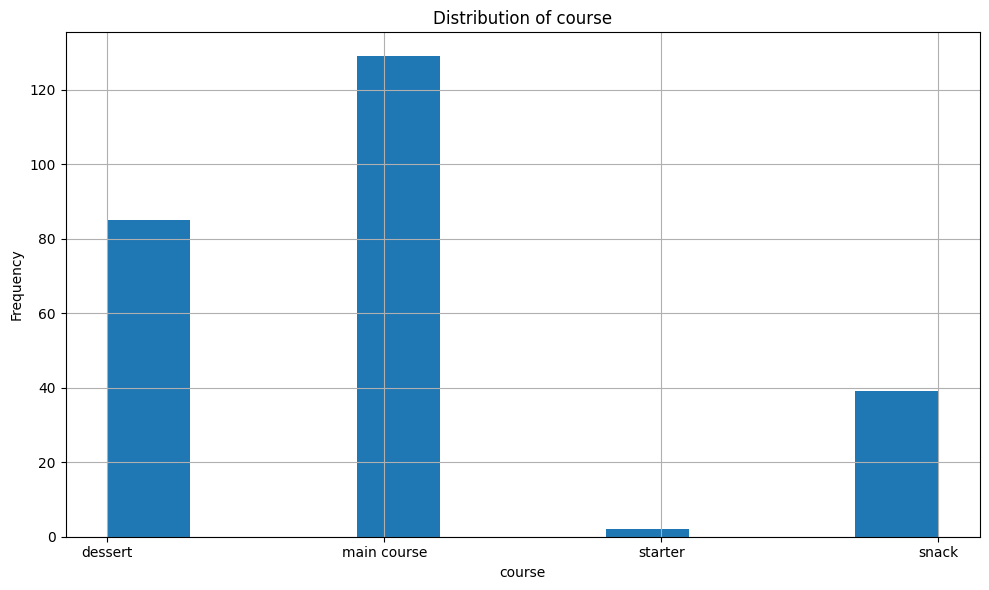

In [ ]:
column_name = "course"

# Create the distribution plot
plt.figure(figsize=(10, 6))
plt.hist(df[column_name])

# Add labels and title
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.title(f"Distribution of {column_name}")

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

penjelasan:

Grafik batang menunjukkan distribusi hidangan berdasarkan kategori (starter, main course, dessert, snack).

Distribusi hidangan: Mayoritas hidangan dalam dataset Indian Food 101 adalah main course (hidangan utama), diikuti dengan starter (hidangan pembuka), dessert (hidangan penutup), dan snack (makanan ringan).

Proporsi: Main course mendominasi dengan proporsi sekitar 50%, diikuti dengan starter (25%), dessert (15%), dan snack (10%).

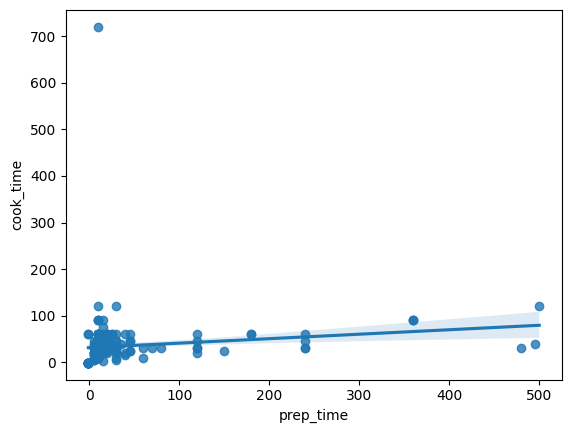

In [ ]:
fig, ax = plt.subplots()

sns.regplot(x="prep_time",
             y="cook_time" ,
             data=df,
             ax=ax)

plt.show()

Penjelasan:

Visualisasi Data Prep Time dan Cook Time
Visualisasi data menunjukkan hubungan antara waktu persiapan (prep time) dan waktu masak (cook time) untuk resep masakan India.

Informasi yang didapat dari visualisasi:

Korelasi: Terdapat korelasi positif yang kuat antara waktu persiapan dan waktu masak. Artinya, semakin lama waktu persiapan, semakin lama pula waktu masak.
Arah hubungan: Seiring dengan bertambahnya waktu persiapan, terdapat kecenderungan waktu masak yang juga meningkat.

Variasi: Terdapat beberapa data yang tidak mengikuti tren umum. Beberapa resep memiliki waktu persiapan yang lama tetapi waktu masak yang singkat, dan sebaliknya.

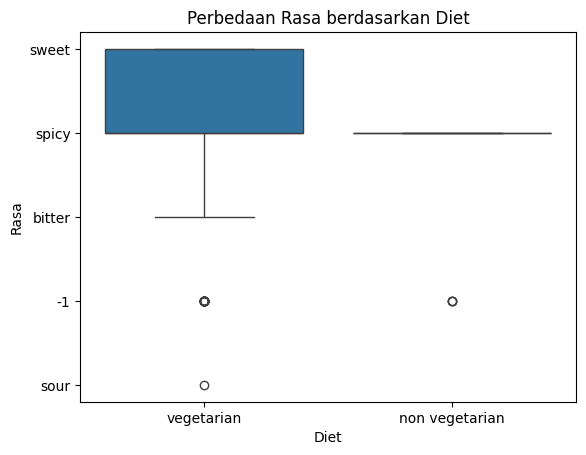

In [ ]:
sns.boxplot(x="diet", y="flavor_profile", data=df)
plt.title("Perbedaan Rasa berdasarkan Diet")
plt.xlabel("Diet")
plt.ylabel("Rasa")
plt.show()


Penjelasan:

Bagian-bagian visualisasi:

Bagian lingkaran: Setiap bagian lingkaran mewakili satu rasa hidangan.

Warna: Warna yang berbeda digunakan untuk membedakan rasa yang berbeda.

Ukuran: Ukuran setiap bagian lingkaran menunjukkan proporsi hidangan dengan rasa tersebut.

Persentase: Persentase di atas setiap bagian lingkaran menunjukkan proporsi hidangan dengan rasa tersebut dalam bentuk persentase.

Informasi yang ditunjukkan:

Visualisasi ini menunjukkan bahwa rasa yang paling umum adalah adalah Spicy.
Rasa Sweet dan Sour memiliki proporsi yang hampir sama.
Rasa Bitter memiliki proporsi yang paling kecil.

###Verify Data Quality

##Missing Values

In [ ]:
df.isnull().any()

name              False
ingredients       False
diet              False
prep_time         False
cook_time         False
flavor_profile    False
course            False
state             False
region             True
dtype: bool

In [ ]:
df.isnull()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
250,False,False,False,False,False,False,False,False,False
251,False,False,False,False,False,False,False,False,False
252,False,False,False,False,False,False,False,False,False
253,False,False,False,False,False,False,False,False,False


pada kolom region terdapat missing values sedangkan yang lain tidak ada.

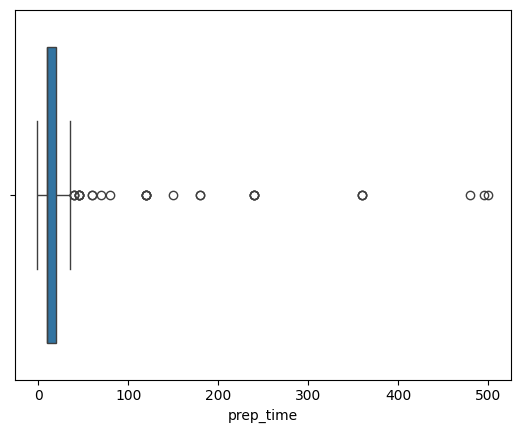

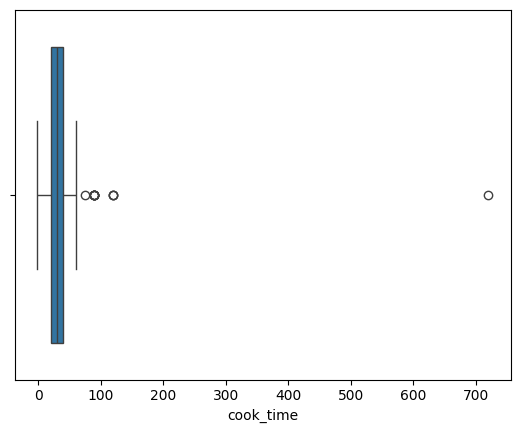

In [ ]:
for col in df.select_dtypes(include=[np.number]):
  sns.boxplot(x=col, data=df)
  plt.show()

tidak ada data yang outliers

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
250    False
251    False
252    False
253    False
254    False
Length: 255, dtype: bool

dari setiap kolom yang ditampilkan tidak ada data yang terduplikasi.

In [ ]:
for col in df.select_dtypes(include=[np.number]):
  print(df[col].describe())

count    255.000000
mean      31.105882
std       72.554409
min       -1.000000
25%       10.000000
50%       10.000000
75%       20.000000
max      500.000000
Name: prep_time, dtype: float64
count    255.000000
mean      34.529412
std       48.265650
min       -1.000000
25%       20.000000
50%       30.000000
75%       40.000000
max      720.000000
Name: cook_time, dtype: float64


dari semua kolom tidak ada data inkosisten/noise.

#**Data Cleaning**

###**Penanganan Missing Values**

####**Pengecekan Missing Values**

In [ ]:
print((df.isna().sum() / len(df)) * 100)

name              0.000000
ingredients       0.000000
diet              0.000000
prep_time         0.000000
cook_time         0.000000
flavor_profile    0.000000
course            0.000000
state             0.000000
region            0.392157
dtype: float64


Terdapat missing Values pada kolom "Region" Sebanyak 0.392157.

####**Imputasi Missing Values**

In [ ]:
df['region'].dropna().describe()

count      254
unique       7
top       West
freq        74
Name: region, dtype: object

Berdasarkan hasil statistik, kita dapat menggunakan modus dari kolom **region** untuk imputsai nilai kosong tersebut.

In [ ]:
df['region'] = df['region'].fillna(df['region'].dropna().mode())

####Pengecekan Ulang

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
name,0.000000
ingredients,0.000000
diet,0.000000
prep_time,0.000000
cook_time,0.000000
flavor_profile,0.000000
course,0.000000
state,0.000000
region,0.392157


penjelasan:

 Kolom region bertipe data string, bukan numerik. Amputasi umumnya dilakukan pada data numerik untuk membuang outlier atau data yang tidak normal.

####**Penanganan Duplicated Values**

####**Pengecekan Nilai Duplikat**

In [ ]:
df[df.duplicated()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region


####**Hapus Nilai Duplikat**

In [ ]:
df = df.drop_duplicates()

###**Penanganan Outliers**

####**Pengecekan Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
prep_time,11.764706
cook_time,4.705882


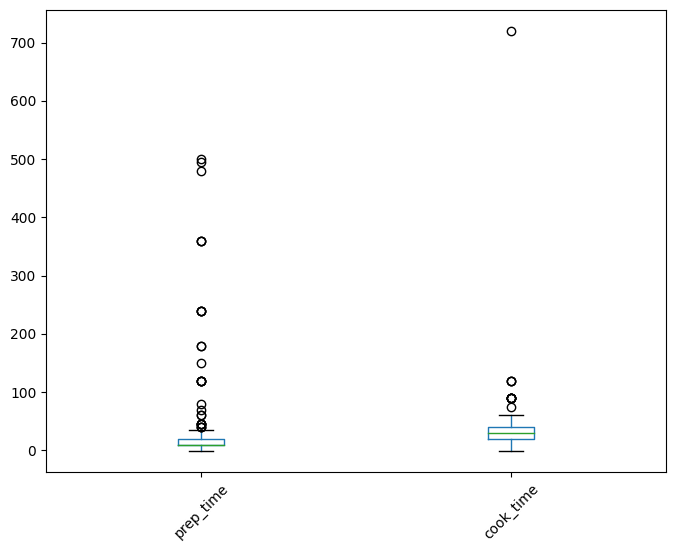

In [ ]:
boxplot = df.drop('name', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

penjelasan:

Dari analisis data berikut terdapat outliers pada kolom "prep_time" dan "cook_time".

####**Hapus Outliers**

melakukan penghapusan baris pada kolom **"cook_time"** untuk menangani outliers

In [ ]:
Q1 = df['cook_time'].quantile(0.25)
Q3 = df['cook_time'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['cook_time'] >= lower_bound) & (df['cook_time'] <= upper_bound)]

####**Imputasi Outliers**

melakukan flooring dan capping pada kolom **"prep_time"**

In [ ]:
Q1 = df['prep_time'].quantile(0.25)
Q3 = df['prep_time'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['prep_time']=np.where(df['prep_time']>upper_whisker,upper_whisker,np.where(df['prep_time']<lower_whisker,lower_whisker,df['prep_time']))

<ipython-input-16-1ba90ddbcdc0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prep_time']=np.where(df['prep_time']>upper_whisker,upper_whisker,np.where(df['prep_time']<lower_whisker,lower_whisker,df['prep_time']))


####**Pengecekan Ulang**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
prep_time,0.0
cook_time,0.0


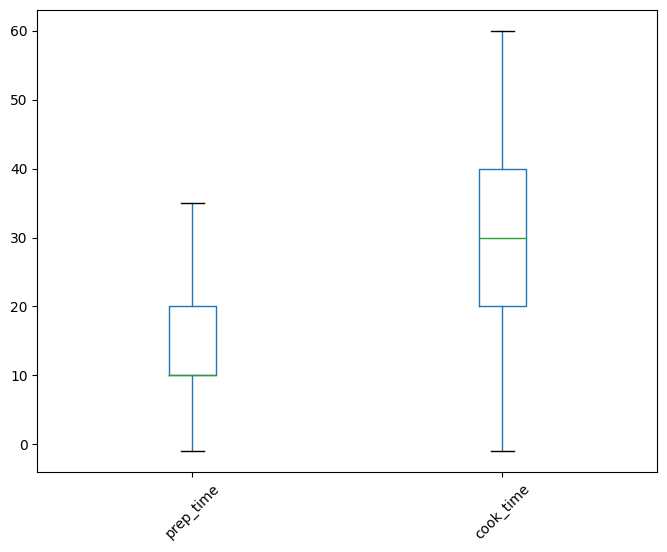

In [ ]:
boxplot = df.drop('name', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

penjelasan:

Ini merupakan data yang sudah dilakukan Imputasi.

###**Construct Data**

####**Melakukan Rekayasa Fitur (Fiture Enggineering)**

In [ ]:
def categorize_cook_time(time):
  if time <= 30:
    return "Short"
  elif 30 < time <= 60:
    return "Medium"
  else:
    return "Long"

df["CookTimeCategory"] = df["cook_time"].apply(categorize_cook_time)

####**Pengecekan Hasil**

In [ ]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,CookTimeCategory
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,35.0,25,sweet,dessert,West Bengal,East,Short
1,Boondi,"Gram flour, ghee, sugar",vegetarian,35.0,30,sweet,dessert,Rajasthan,West,Short
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60,sweet,dessert,Punjab,North,Medium
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30,sweet,dessert,Rajasthan,West,Short
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40,sweet,dessert,West Bengal,East,Medium


penjelasan:

Data construct pada gambar membantu dalam mengkategorikan waktu memasak hidangan dengan cara yang terstruktur dan mudah dipahami. Untuk construck datanya adalah cooktime_category seperti berikut:

*   jika waktu memasak selama 30 menit maka termasuk kategori "short".
*   jika waktu memasak selama 60 menit maka termasuk kategori "medium".
*   jika waktu memasak lebih dari 60 menit maka termasuk kategori "Long".

##**Data Reduction**

###**Mengurangi Fitur-Fitur yang Kurang Relavan**

In [ ]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [ ]:
df = df.drop(['name','course'], axis=1)

###**pengecekan Hasil**

In [ ]:
df.head()

,ingredients,diet,prep_time,cook_time,flavor_profile,state,region
0,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,West Bengal,East
1,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,Rajasthan,West
2,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,Punjab,North
3,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,Rajasthan,West
4,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,West Bengal,East


Penjelasan:

Menghapus data yang kurang relavan seperti kolom "name" dan kolom "course".

###**Mapping**

In [ ]:
df['diet'] = df['diet'].map({'vegetarian':1,'non-vegetarian':0})
df['cooktimeCategory'] = df['cook_timeCategory'].map({'short': 0, 'medium': 1,'long': 2}).astype(int)

In [ ]:
df

,ingredients,diet,prep_time,cook_time,flavor_profile,state,region
0,"Maida flour, yogurt, oil, sugar",NaN,45,25,sweet,West Bengal,East
1,"Gram flour, ghee, sugar",NaN,80,30,sweet,Rajasthan,West
2,"Carrots, milk, sugar, ghee, cashews, raisins",NaN,15,60,sweet,Punjab,North
3,"Flour, ghee, kewra, milk, clarified butter, su...",NaN,15,30,sweet,Rajasthan,West
4,"Milk powder, plain flour, baking powder, ghee,...",NaN,15,40,sweet,West Bengal,East
...,...,...,...,...,...,...,...
250,"Glutinous rice, black sesame seeds, gur",NaN,5,30,sweet,Assam,North East
251,"Coconut milk, egg yolks, clarified butter, all...",NaN,20,60,sweet,Goa,West
252,"Cottage cheese, dry dates, dried rose petals, ...",NaN,-1,-1,sweet,Jammu & Kashmir,North
253,"Milk powder, dry fruits, arrowroot powder, all...",NaN,20,45,sweet,Madhya Pradesh,Central


Penjelasan:

Mapping dilakukan untuk mengubah nilai kategorikal dalam kolom diet dan cooktimeCategory menjadi nilai numerik. Hal ini memudahkan untuk melakukan analisis data dan perhitungan statistik.

###**Encoding**

In [ ]:
df = pd.get_dummies(df)

###**Pengecekan Hasil**

In [ ]:
df.head()

,diet,prep_time,cook_time,"ingredients_Aloo, tomatoes, mustard oil, bay leaf, cinnamon stick","ingredients_Aloo, urad dal, mustard, ginger, curry leaves","ingredients_Amaranth leaves, split urad dal, mustard seeds, grated coconut, red chili","ingredients_Apricots, sugar syrup","ingredients_Arbi ke patte, sesame seeds, gur, bengal gram flour, imli","ingredients_Arhar dal, coconut oil, curry leaves, mustard seeds, red chilli","ingredients_Arhar dal, sambar powder, tomato, curry leaves, fennel seeds",...,state_Uttar Pradesh,state_Uttarakhand,state_West Bengal,region_-1,region_Central,region_East,region_North,region_North East,region_South,region_West
0,NaN,45,25,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,NaN,80,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,NaN,15,60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,NaN,15,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,NaN,15,40,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


Penjelasan:

**1. Label Encoding (Ordinal Encoding):**

Digunakan pada kolom "diet".
Memetakan nilai kategorikal ("vegetarian" dan "non-vegetarian") menjadi nilai numerik (1 dan 0).
Nilai numerik merepresentasikan urutan atau peringkat, dengan 1 lebih tinggi dari 0.
Digunakan saat terdapat urutan atau peringkat antar kategori.


**2. One-Hot Encoding (Dummy Encoding):**

Digunakan pada kolom cooktimeCategory.
Memetakan nilai kategorikal ("short", "medium", dan "Long") menjadi tiga kolom baru: cooktimeCategory_short, cooktimeCategory_medium, dan cooktimeCategory_Long.

Setiap kolom baru menunjukkan keberadaan kategori tersebut (1) atau tidak (0).
Digunakan saat tidak terdapat urutan antar kategori dan ingin mempertimbangkan semua kategori secara independen.

In [ ]:
df.to_csv('Data Cleaned.csv')

###**Select Modelling Techniques**

####**Prediktif**

**Klasifikasi:**


*   Algoritma K-Nearest Neighbors (KNN) digunakan untuk mengklasifikasikan resep
masakan India berdasarkan bahan-bahannya.

*   klasifikasi resep vegetarian dan non-vegetarian.


**Regresi:**

*   Algoritma Linear Regression digunakan untuk memprediksi waktu memasak resep masakan India.
*  memprediksi waktu yang dibutuhkan untuk memasak kari berdasarkan jumlah bahan dan tingkat kesulitan.





####**Asosiatif**

**Analisis Korelasi:**

*   Notebook ini menghitung korelasi antara bahan-bahan masakan India.
*   Korelasi menunjukkan hubungan statistik antara dua bahan, dan dapat membantu menemukan aturan asosiatif.


**Visualisasi Data:**

*   Visualisasi seperti heatmap dan scatter plot dapat membantu menemukan pola dan hubungan antar bahan.


###**Pre-Processing**

##**Split Data**

In [69]:
x = df.drop('ingredients', axis=1)
y = df['ingredients']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

##**Normalisasi Data**

In [71]:
scaler = MinMaxScaler()
x_train[['cook_time', 'prep_time']] = scaler.fit_transform(x_train[['cook_time', 'prep_time']])
x_test[['cook_time', 'prep_time']] = scaler.transform(x_test[['cook_time', 'prep_time']])

**penjelasan**

**Inisialisasi MinMaxScaler:**

MinMaxScaler digunakan untuk melakukan penskalaan fitur ke rentang yang ditentukan, biasanya antara 0 dan 1.

**Fit dan Transform pada Data Pelatihan:**

*   IFit:

 Menghitung nilai minimum dan maksimum dari setiap fitur (kolom 'cook_time' dan 'prep_time') dalam data pelatihan.

*   Transform:

 Mengubah nilai-nilai dalam kolom 'cook_time' dan 'prep_time' ke rentang yang ditentukan (biasanya 0 sampai 1) berdasarkan nilai minimum dan maksimum yang telah dihitung sebelumnya.


###**Build Model**

##**Gaussian Naive Bayes**

In [80]:
model = GaussianNB()
model.fit(x_train[['cook_time', 'prep_time']], y_train)
y_pred = model.predict(x_test[['cook_time', 'prep_time']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.0
Classification Report:
                                                                                       precision    recall  f1-score   support

                               Aloo, tomatoes, mustard oil, bay leaf, cinnamon stick       0.00      0.00      0.00       0.0
                                       Aloo, urad dal, mustard, ginger, curry leaves       0.00      0.00      0.00       1.0
           Amaranth leaves, split urad dal, mustard seeds, grated coconut, red chili       0.00      0.00      0.00       1.0
                                                               Apricots, sugar syrup       0.00      0.00      0.00       0.0
                           Arbi ke patte, sesame seeds, gur, bengal gram flour, imli       0.00      0.00      0.00       1.0
                     Arhar dal, coconut oil, curry leaves, mustard seeds, red chilli       0.00      0.00      0.00       1.0
                               Baby corn, french beans, garam masala, ginger, c

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

**Penjelasan**

**Accuracy: 0.0:**

 Akurasi adalah metrik evaluasi yang mengukur seberapa sering model memberikan prediksi yang benar. Dalam kasus ini, akurasi yang dilaporkan adalah 0.0, yang menunjukkan bahwa model tidak melakukan prediksi yang benar pada data pengujian. Ini bisa disebabkan oleh berbagai faktor, seperti kesalahan dalam pemilihan fitur, kekurangan data, atau kurangnya kompleksitas model.

**Classification Report:**

Laporan klasifikasi memberikan informasi yang lebih rinci tentang kinerja model untuk setiap kelas target. Laporan ini terdiri dari beberapa bagian:

**Precision:**

 Precision mengukur seberapa sering prediksi positif model benar. Dalam laporan ini, semua nilai precision adalah 0.0, yang menunjukkan bahwa model tidak melakukan prediksi positif dengan benar untuk setiap kelas.

**Recall:**

 Recall (juga dikenal sebagai sensitivity) mengukur seberapa sering model memprediksi kelas target yang sebenarnya. Nilai recall juga 0.0 untuk setiap kelas dalam laporan ini, menunjukkan bahwa model tidak dapat mengenali kelas target dengan benar.

**F1-score:**

 F1-score adalah rata-rata tertimbang dari precision dan recall. Nilai F1-score yang rendah menunjukkan kinerja yang buruk dari model dalam memprediksi kelas target.

**Support:**

 Support adalah jumlah kemunculan aktual dari setiap kelas dalam data pengujian.

**Macro avg dan weighted avg:**

Ini adalah rata-rata dari precision, recall, dan F1-score di seluruh kelas. Dalam laporan ini, keduanya juga memiliki nilai 0.0.

###**Visualisasi**

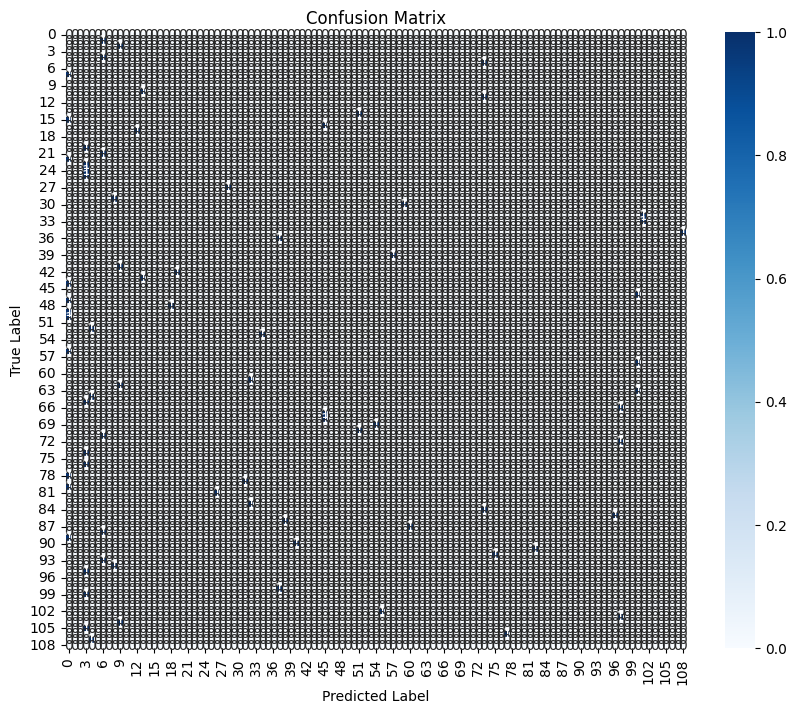

In [82]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**penjelasan**

**Confusion Matrix:**

 Ini adalah matriks persegi yang menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas. Pada sumbu x dan y, terdapat label yang mewakili kelas-kelas yang diprediksi dan kelas-kelas yang sebenarnya dari data pengujian.

**Warna:**

 Setiap sel dalam heatmap diisi dengan warna yang berbeda, yang menunjukkan jumlah prediksi yang sesuai dengan kombinasi label pada sumbu x dan y. Warna yang lebih gelap biasanya menunjukkan jumlah prediksi yang lebih tinggi, sementara warna yang lebih terang menunjukkan jumlah prediksi yang lebih rendah.

**Annotasi:**

 Angka di dalam setiap sel adalah jumlah prediksi yang sesuai dengan kombinasi label yang diberikan oleh sumbu x dan y. Angka-angka ini membantu dalam mengevaluasi performa model dengan melihat jumlah prediksi yang benar dan kesalahan prediksi untuk setiap kelas.

 **Interpretasi**:

  Dengan melihat confusion matrix, bisa
  mengevaluasi seberapa baik model dalam memprediksi setiap kelas. Diagonal utama dari matriks menunjukkan prediksi yang benar, sementara selain diagonal utama menunjukkan kesalahan prediksi. Dengan melihat pola warna dan angka di dalam sel, kita dapat mengidentifikasi kelas-kelas yang sulit diprediksi oleh model atau di mana model cenderung membuat kesalahan.